# MainQuest02_가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리


### 1-1 프로젝트 개요  
   
1. 데이터의 이해 
(1) 결측치와 전체 컬럼  
(2) ID와 이름  
(3) 포켓몬의 속성  
(4) 모든 스탯의 총합  
(5) 세부 스탯  
(6) 세대  
  
2. 클래스 비교 분석  
(1) 전설의 포켓몬의 Total값  
(2) 전설의 포켓몬의 이름  
  
3. 데이터 전처리  
(1) 이름의 길이가 10 이상인가?  
(2) 이름에 자주 쓰이는 토큰 추출  
(3) Type 1 & 2! 범주형 데이터 전처리하기  
   
4. 모델 구축  
(1) 가장 기본 데이터로 만드는 베이스라인  
(2) 의사 결정 트리 모델 확습시키기  
(3) 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?  
(4) 의사 결정 트리 모델 다시 학습시키기  

### 1-2. 프로젝트 목표  
- 탐색적 데이터 분석(Exploratory Data Analysis) 과정을 통해 <전설의 포켓몬> 판별하기  


### 1-3. 데이터 출처
[Kaggle] Pokemon with stats: https://www.kaggle.com/datasets/abcsds/pokemon

### 1-4. 포켓몬 데이터 불러오기

- 라이브러러리 가져오기

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


- 데이터셋을 pandas로 불러오기

In [ ]:
import os
original_data = pd.read_csv('Pokemon.csv')
print('슝=3')

슝=3


- pokemon 변수에 데이터를 저장  
(원본데이터와 구분)

In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- Legendary == True 값을 가지는 [레전드 포켓몬] 데이터셋은 [legendary]변수에,  
Legendary == False 값을 가지는 [일반 포켓몬] 데이터셋은 [ordinary] 변수에 저장

In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1-5. 데이터의 이해 (1) 결측치와 전체 칼럼

- 결측치 확인하기


In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- 전체 컬럼 이해하기

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

| Column Name | Data Type | Meaning (Korean)   |
|------------|-----------|-------------------|
| #          | int64     | 포켓몬 번호         |
| Name       | object    | 포켓몬 이름         |
| Type 1     | object    | 첫 번째 속성        |
| Type 2     | object    | 두 번째 속성        |
| Total      | int64     | 능력치 총합         |
| HP         | int64     | 체력 (HP)          |
| Attack     | int64     | 공격력             |
| Defense    | int64     | 방어력             |
| Sp. Atk    | int64     | 특수공격력         |
| Sp. Def    | int64     | 특수방어력         |
| Speed      | int64     | 속도               |
| Generation | int64     | 등장 세대          |
| Legendary  | bool      | 전설 여부          |

### 1-6. 데이터의 이해 (2) ID와 이름

- ID number : 집합에서 800이나 아니라 721이 나왔으므로 중복번호 존재


In [19]:
len(set(pokemon["#"]))

721

In [21]:
# 중복 케릭 예시 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- Name : 이름은 800개로 중복 없음 확인. 모두 Unique한 이름


In [22]:
len(set(pokemon["Name"]))

800

### 1-7. 데이터의 이해 (3) 포켓몬의 속성


Type 1 & Type 2 : 포켓몬의 속성


In [25]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 한 가지만 보유

In [27]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성 존재.  
- Type 2의 속성이 더 많은 이유를 차집합으로 확인

In [28]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

- NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음

- 포켓몬들의 모든 Type을 types 변수에 저장

In [30]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Fighting', 'Rock', 'Bug', 'Ice', 'Dark', 'Flying', 'Ghost', 'Fire', 'Electric', 'Ground', 'Psychic', 'Dragon', 'Fairy', 'Water', 'Poison', 'Steel', 'Grass']


- Type을 하나만 가지고 있는 포켓몬은 몇 마리?  
= Type 2가 NaN인 포켓몬의 수 = 386

In [32]:
print(pokemon["Type 2"].isna().sum())

386


##### Type 1 데이터 분포 plot

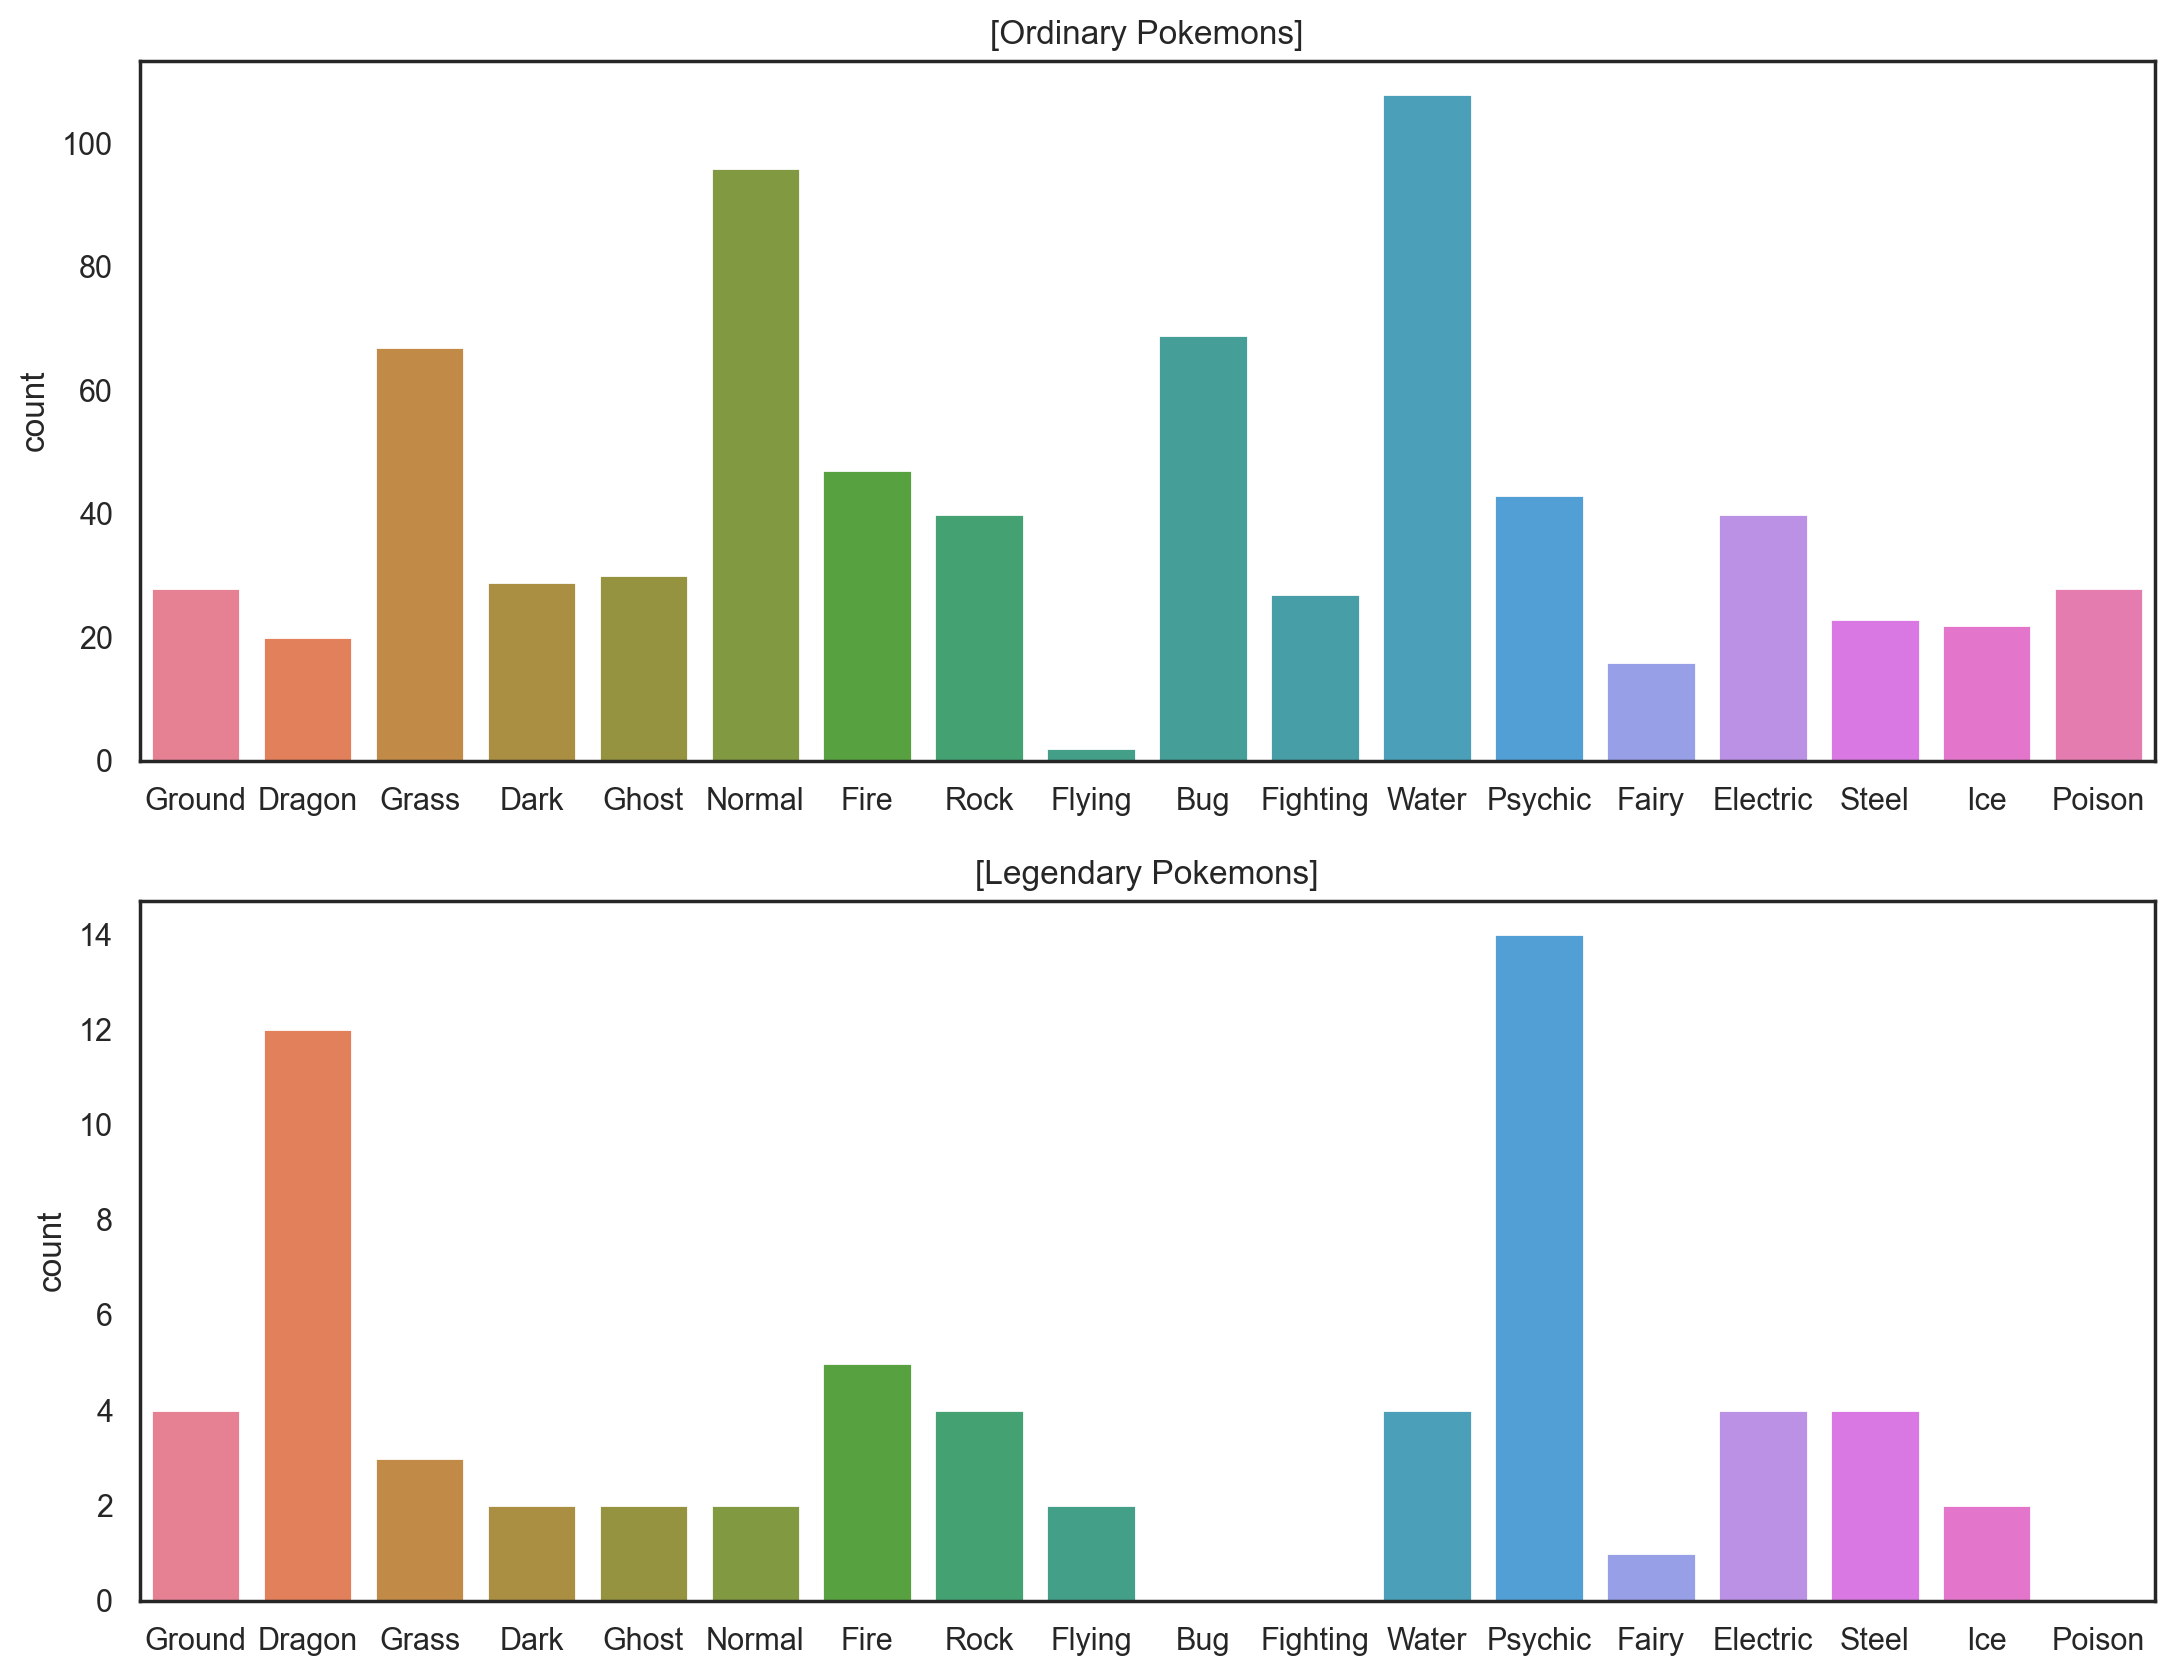

In [76]:
plt.figure(figsize=(13, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", hue="Type 1", order=types, hue_order=types, palette="husl", dodge=False).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplots_adjust(hspace=0.2)  

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", hue="Type 1", order=types, hue_order=types, palette="husl", dodge=False).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

- 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인

In [59]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)


,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Rock,0.090909
Electric,0.090909
Ice,0.083333


##### Type 2 데이터 분포 plot


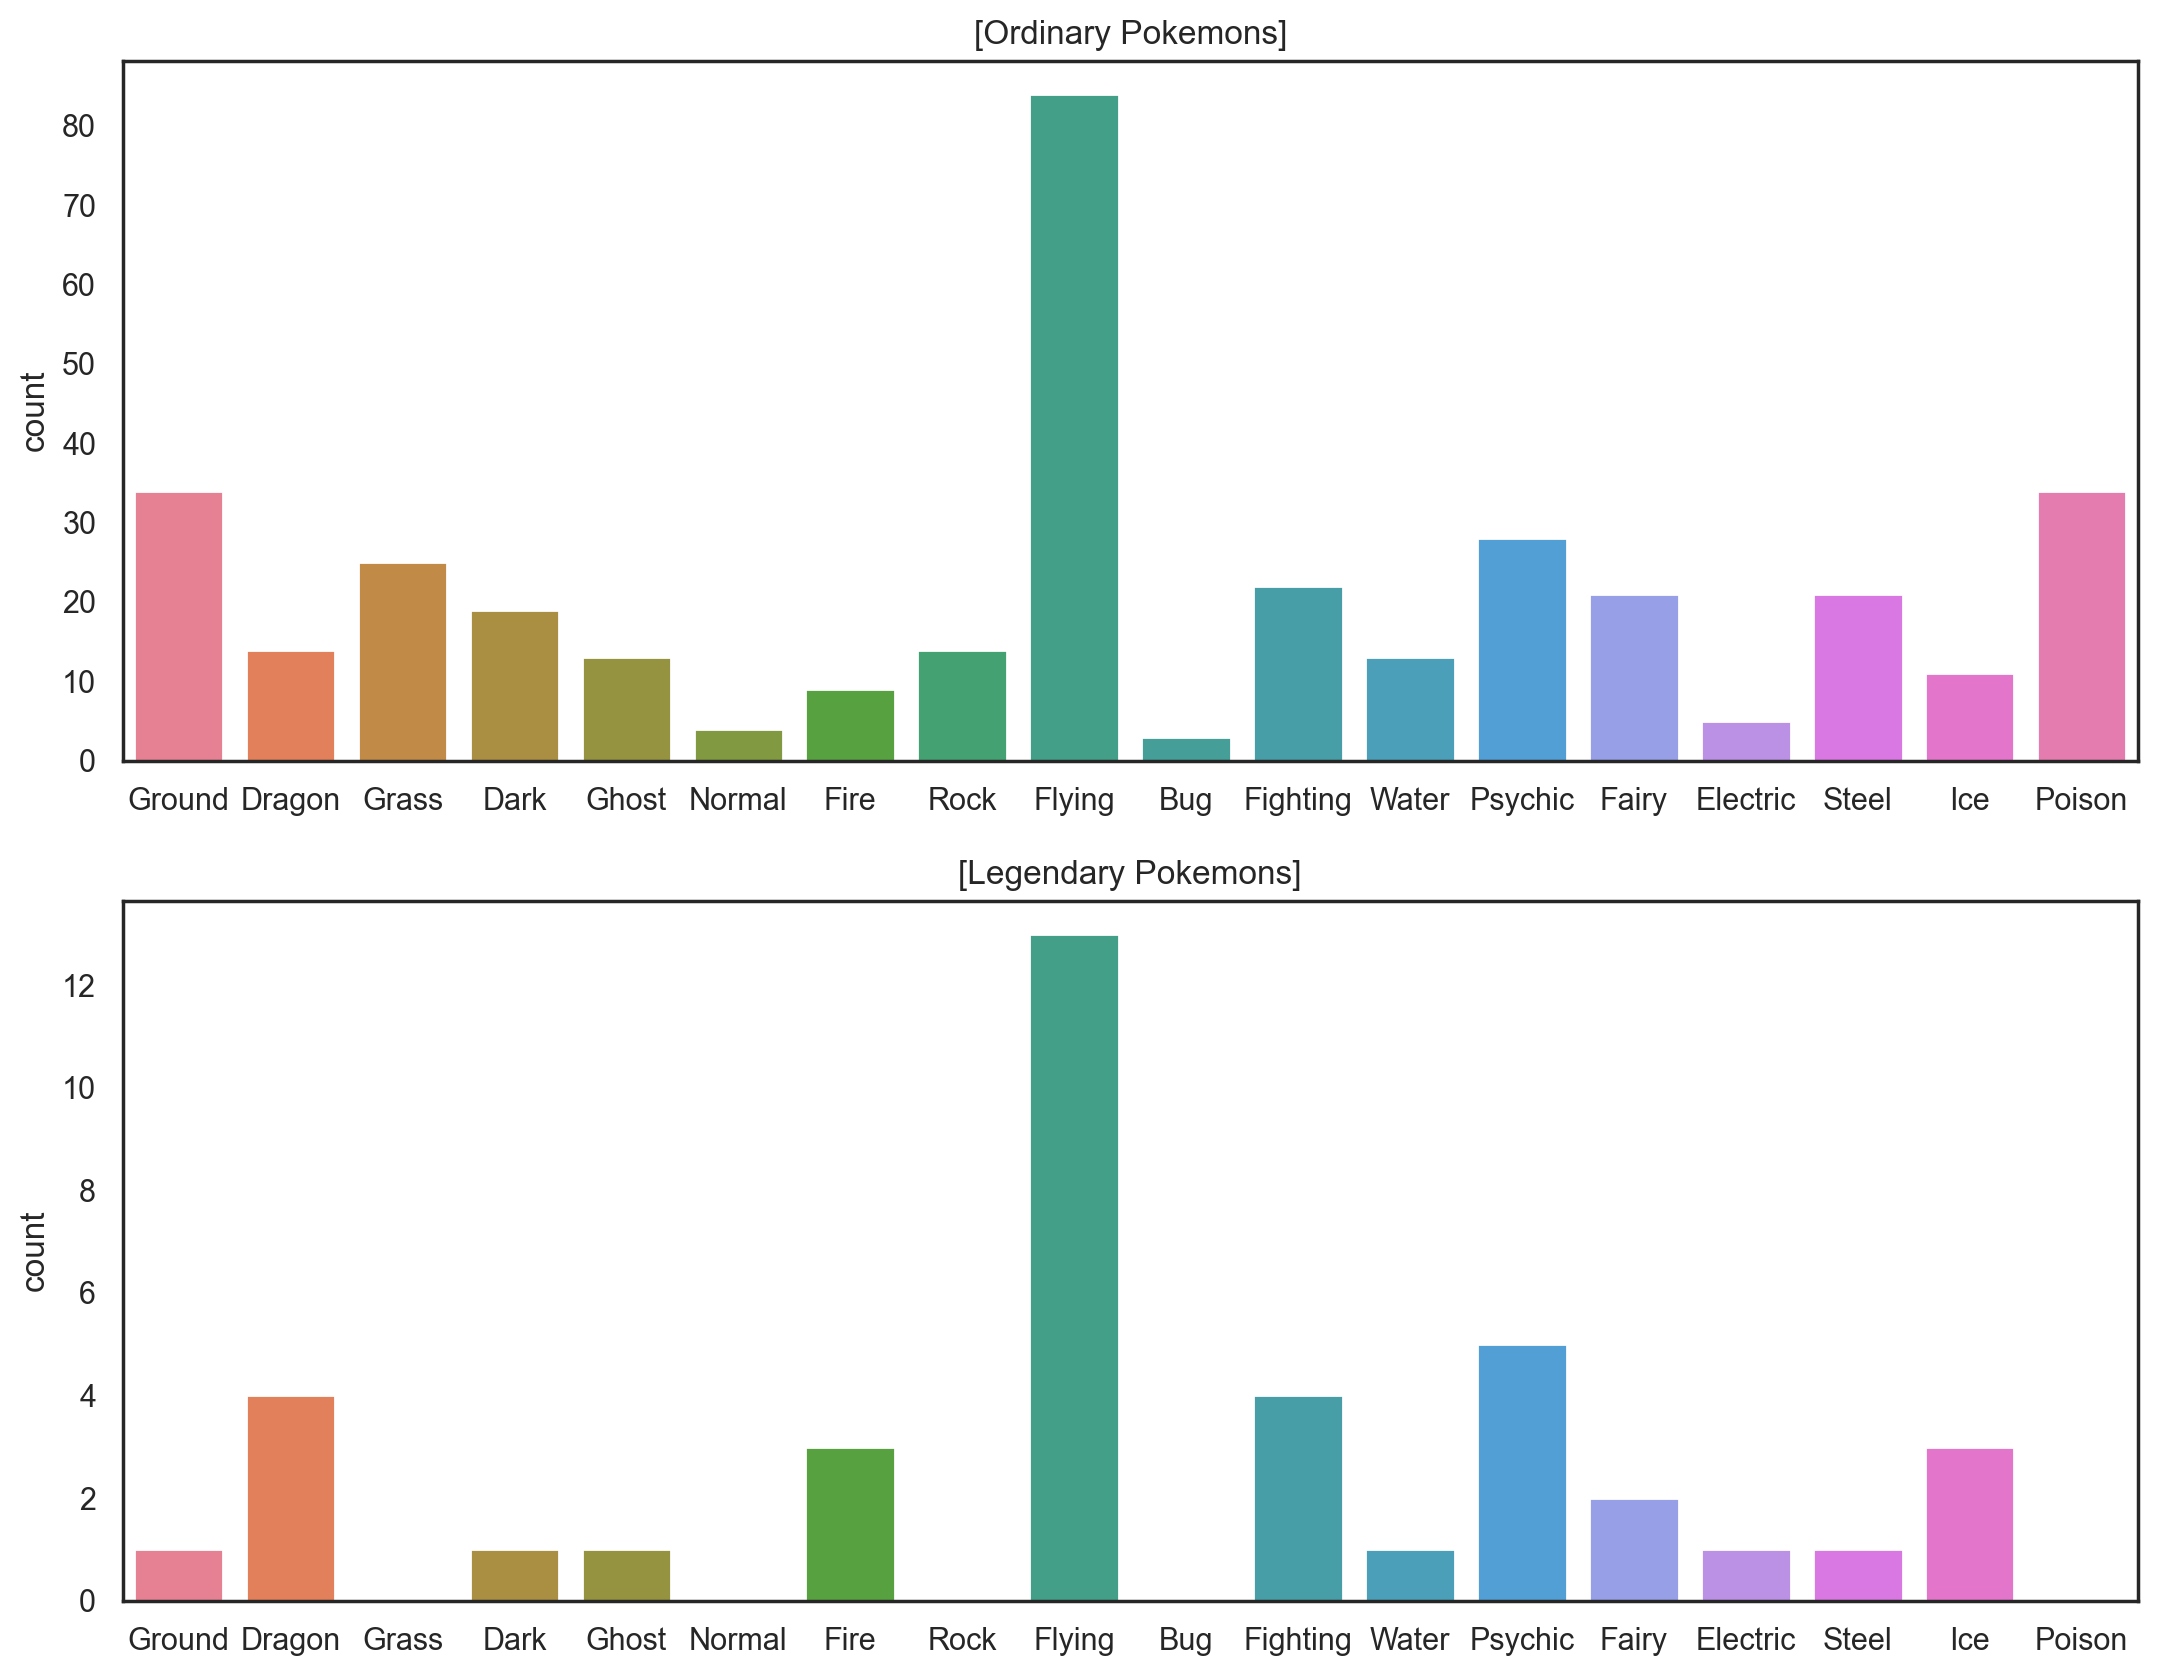

In [75]:
plt.figure(figsize=(13, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", hue="Type 2", order=types, hue_order=types, palette="husl", dodge=False, legend=False).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplots_adjust(hspace=0.2)  

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", hue="Type 2", order=types, hue_order=types, palette="husl", dodge=False, legend=False).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [77]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


### 1-8. 데이터의 이해 (4) 모든 스탯의 총합

##### Total : 모든 스탯의 총합

In [90]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", pokemon.loc[0, stats].astype(int).tolist())
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


pokemon['Total'].values와 pokemon[stats].values들의 총합이 같은 포켓몬의 개수는 800으로  
모든 포켓몬이 total 가 정상

In [91]:
stat_count = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).sum()
print(stat_count)

800


##### Total값에 따른 분포 Scatterplot


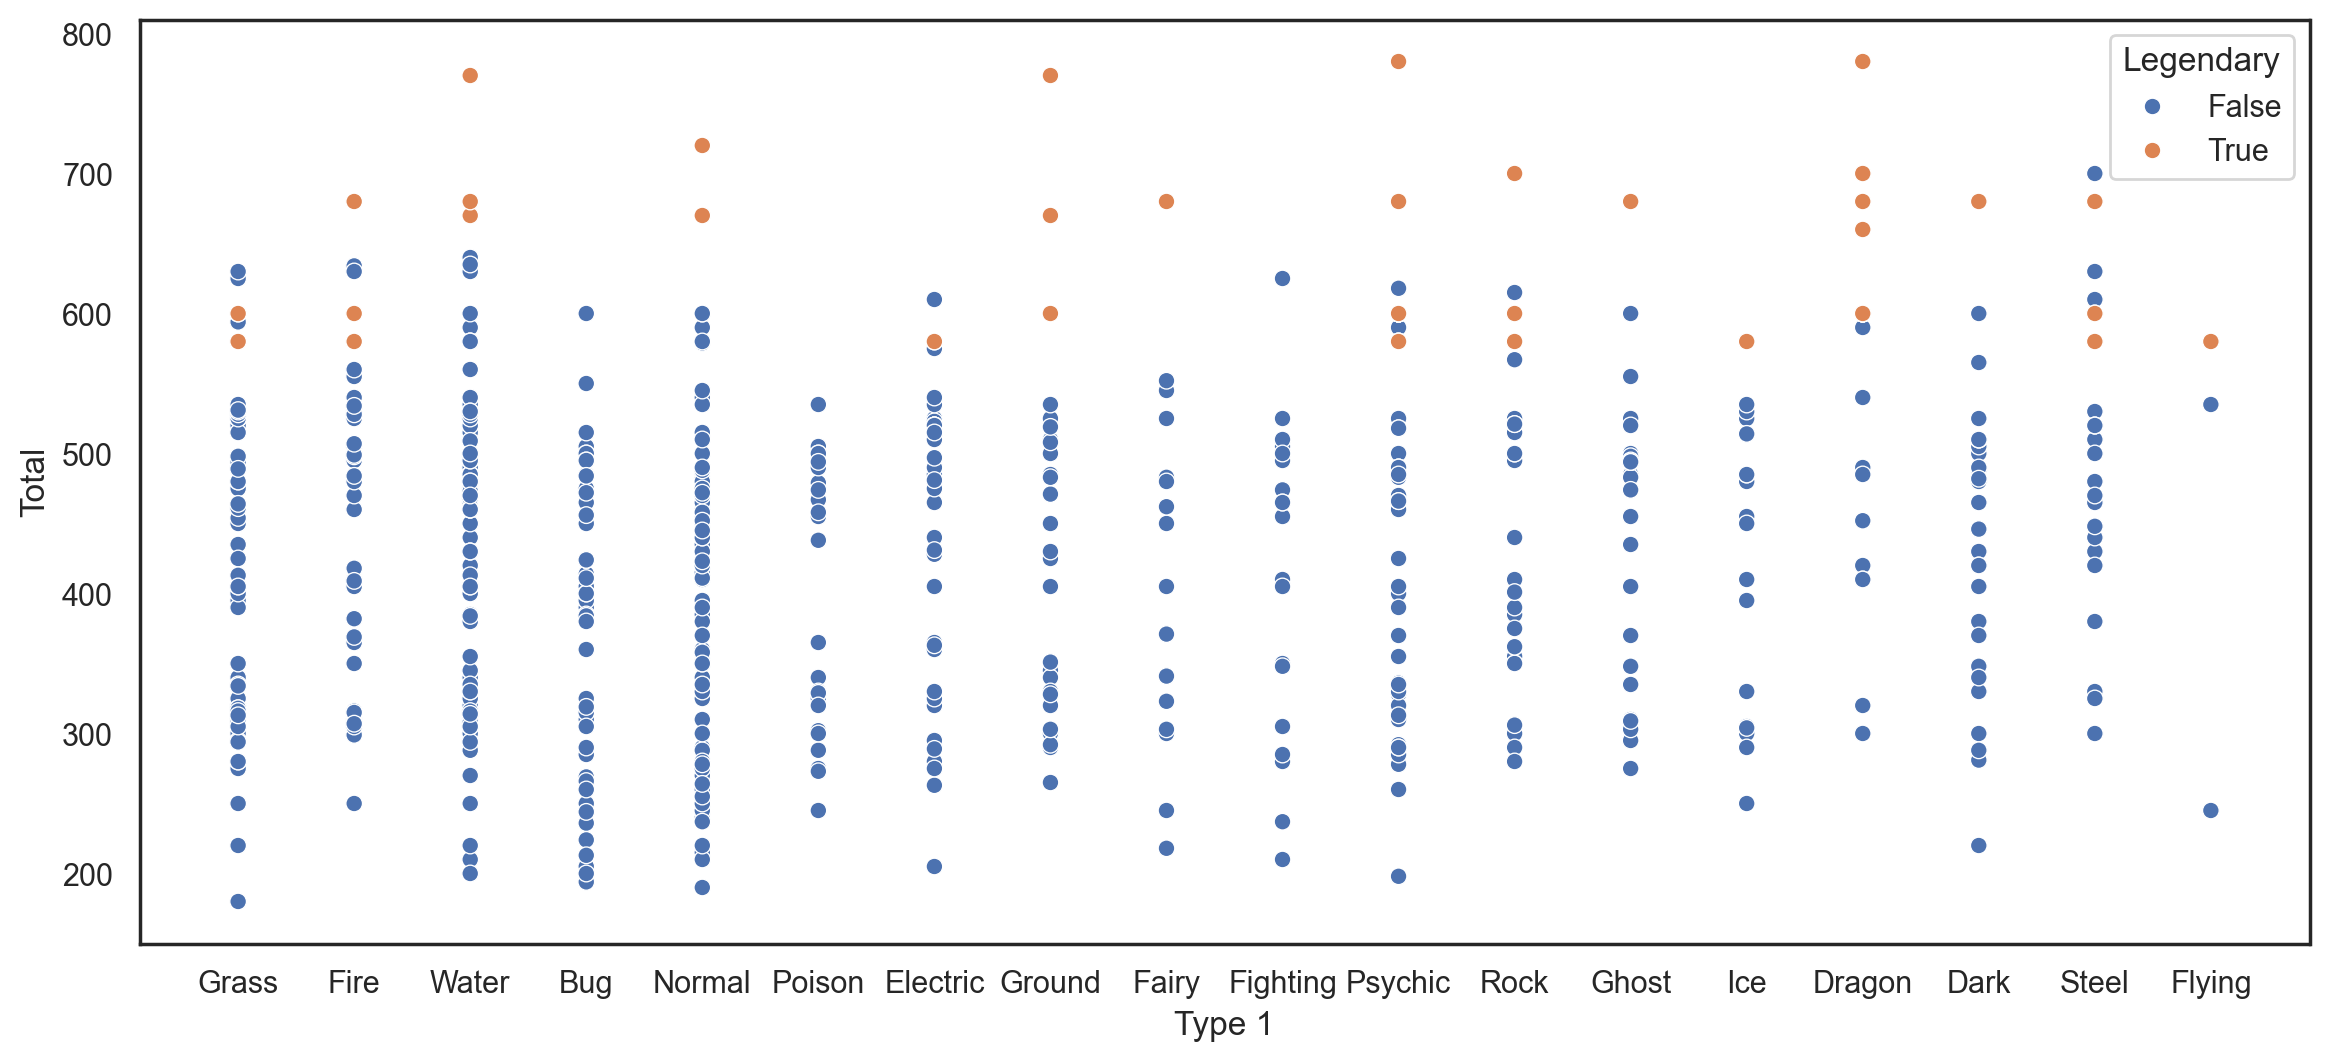

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)  

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

### >>> 노란점(전설의 포켓몬)의 스탯 총합이 대체로 상위에 위치

### 1-9. 데이터의 이해 (5) 세부 스탯


- 각 stat별 분포도

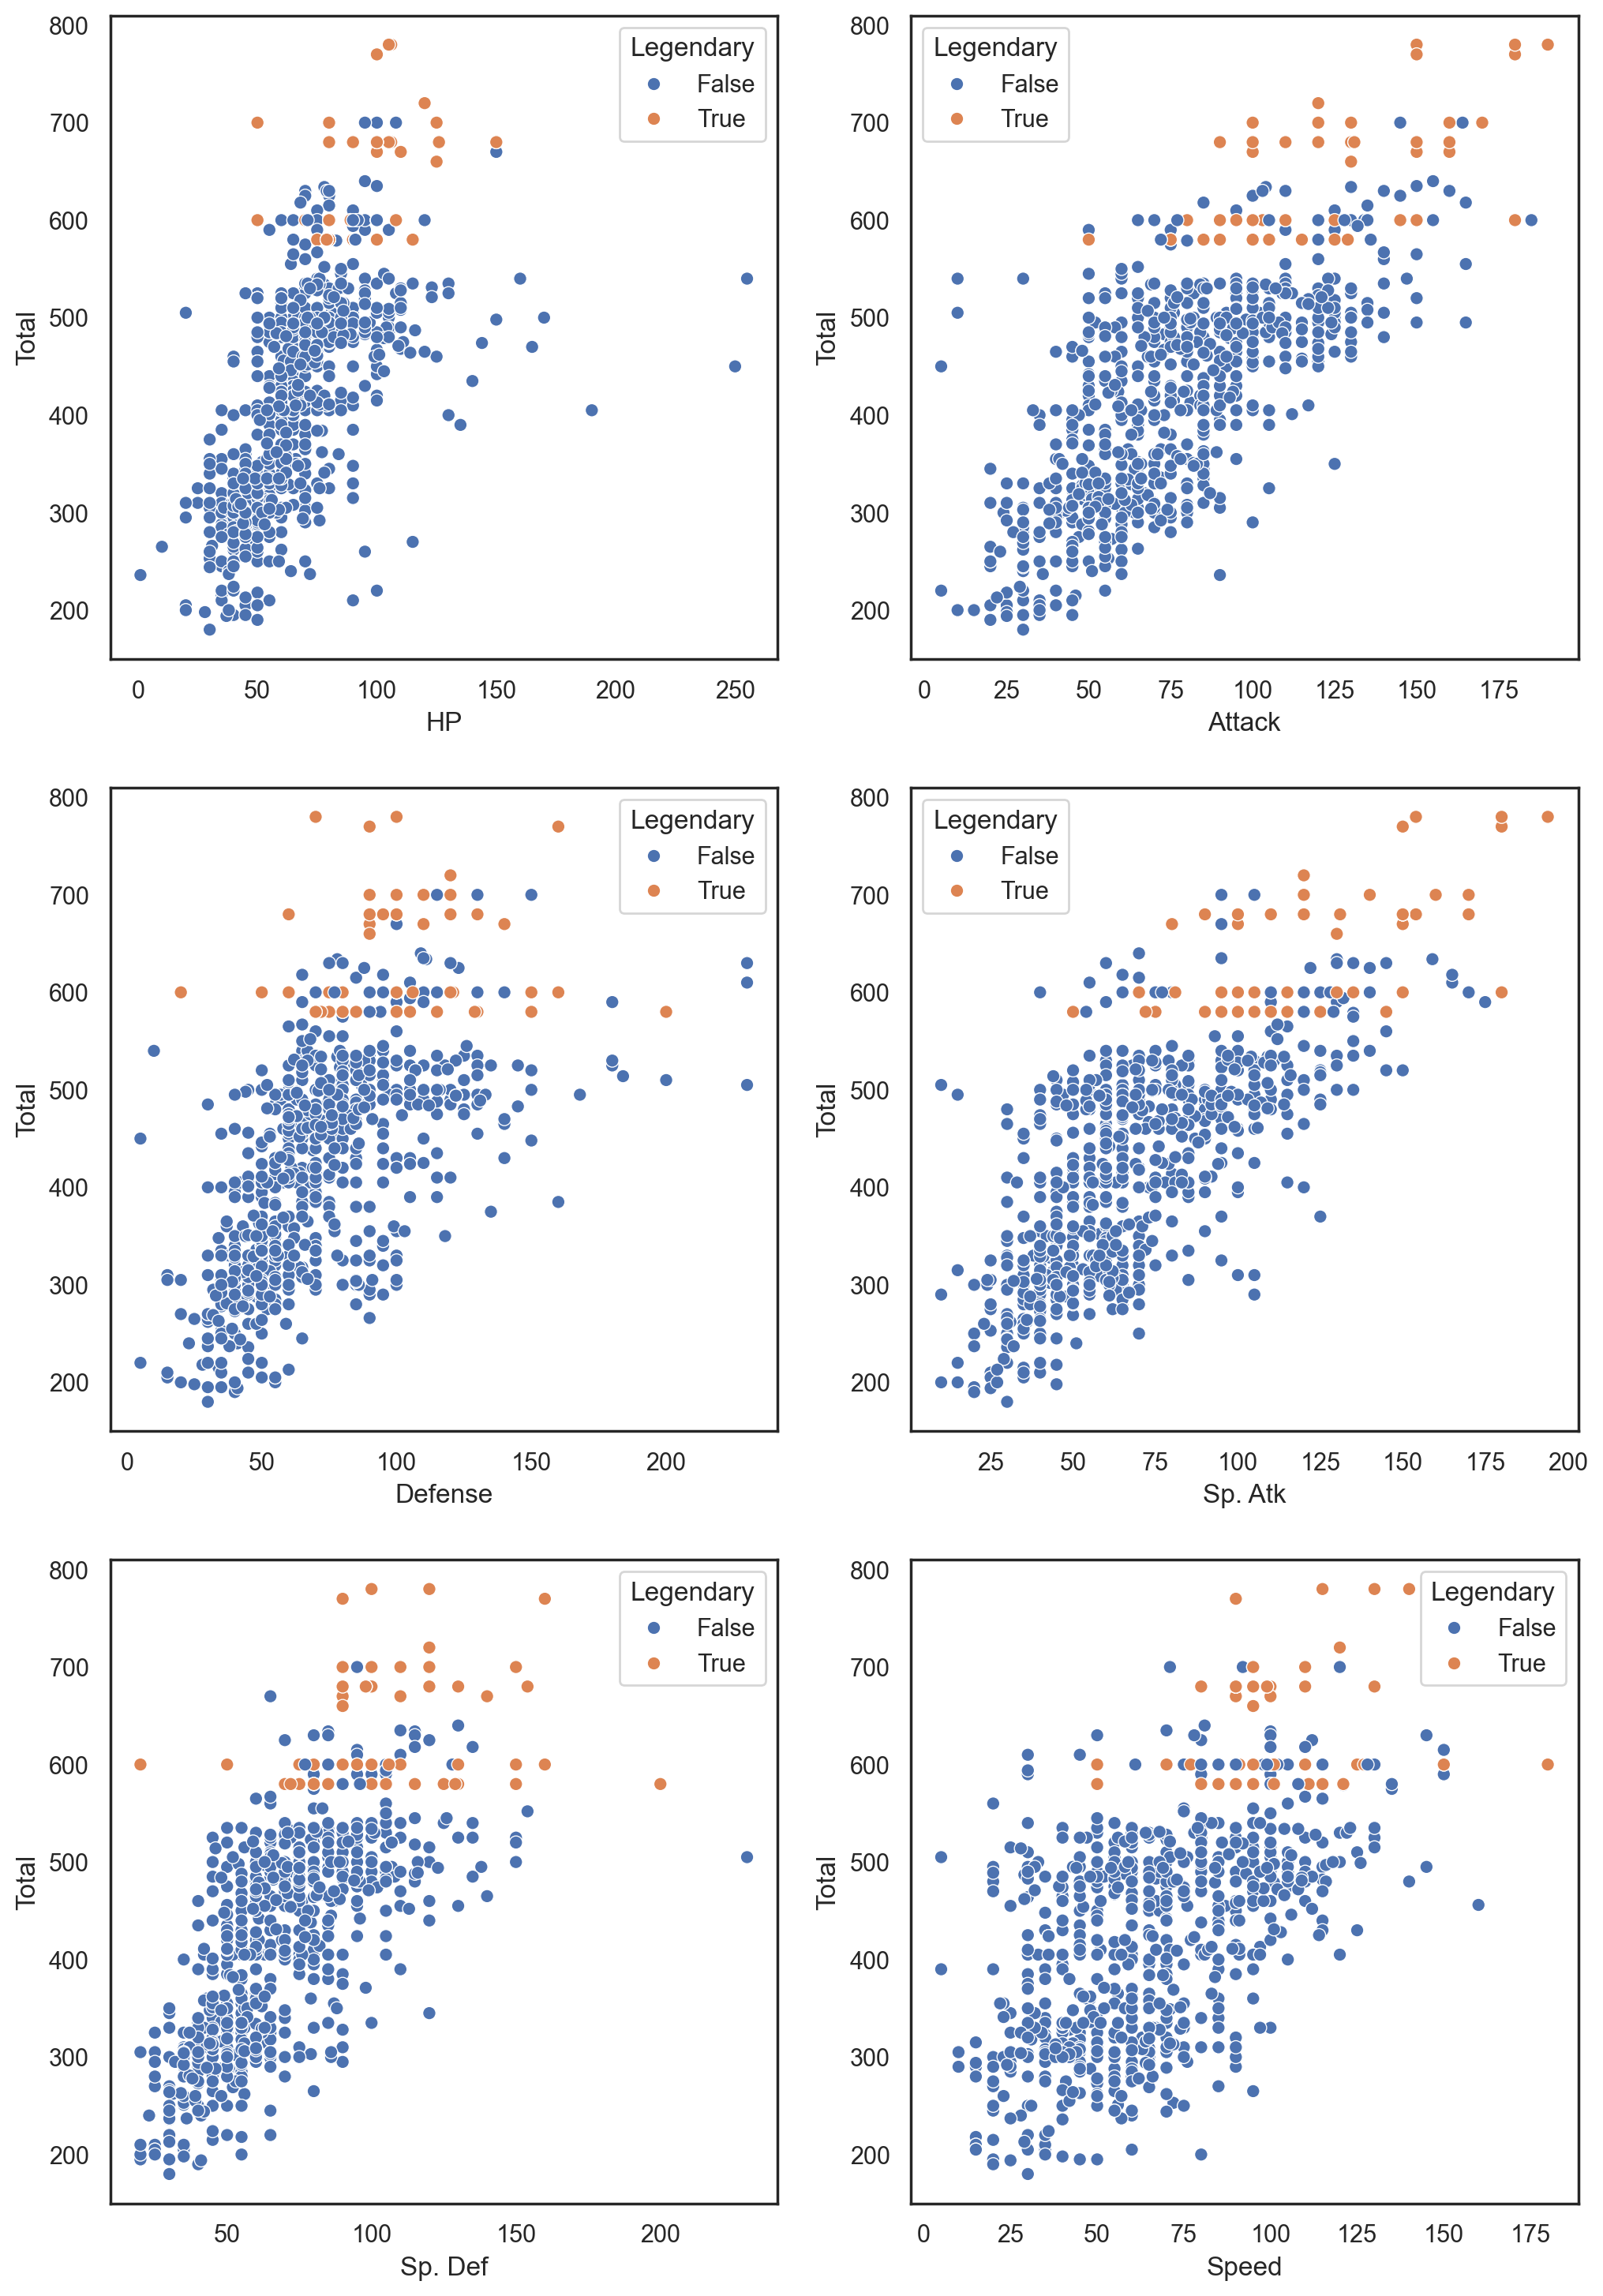

In [89]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

### 스탯 분석
- HP, Defense, Sp. Def:  
    - 전설 포켓몬: 대체로 높은 스탯  
    - 일반 포켓몬 중 전설포켓몬 보다 높은 포켓몬 존재, but Total은 여전히 낮음. 특정 스탯이 특화됨.(수비형)  
- Attack, Sp. Atk, Speed:   
    - Total과 비례  
    - 전설 포켓몬: 최고치 보유, 강력한 공격력과 속도

### 1-10. 데이터의 이해 (6) 세대

##### Generation : 포켓몬의 세대  
- Generation은 각 포켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 포켓몬이 존재

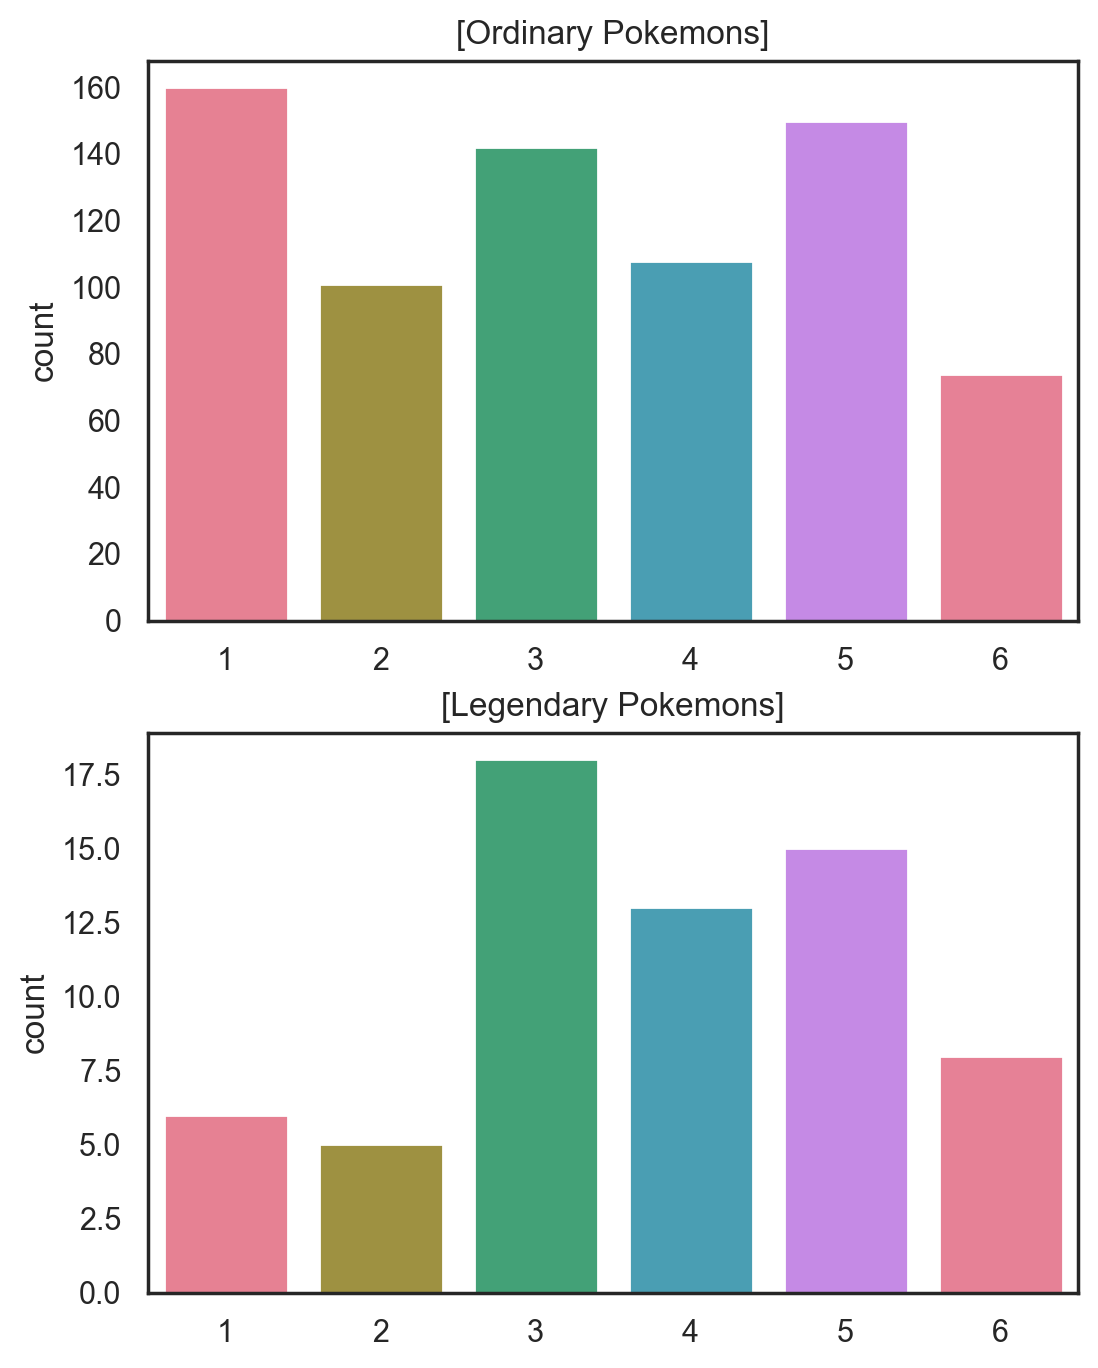

In [122]:
plt.figure(figsize=(6, 8))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation", hue="Generation", dodge=False, legend=False, palette="husl").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation", hue="Generation", dodge=False, legend=False, palette="husl").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

### 1-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값

##### 전설의 포켓몬의 Total 값

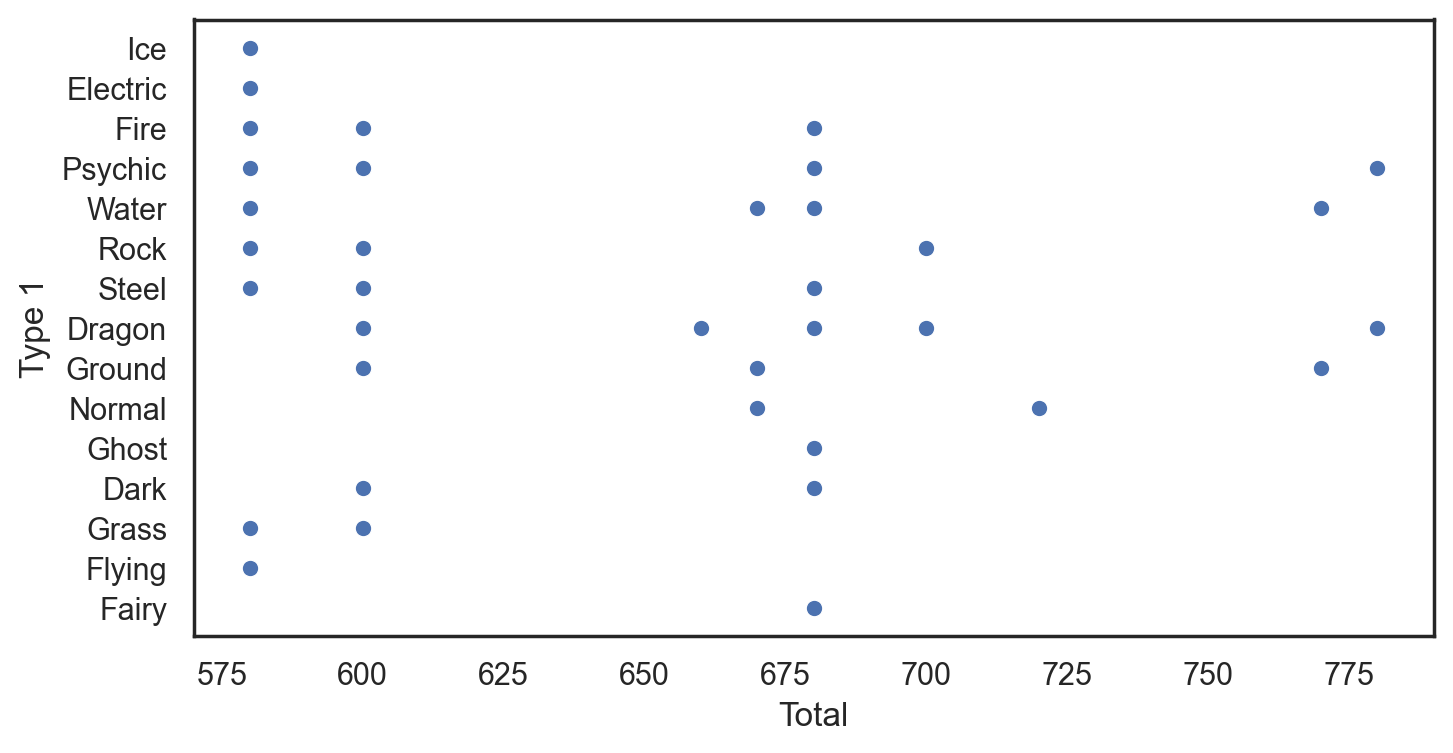

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [104]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


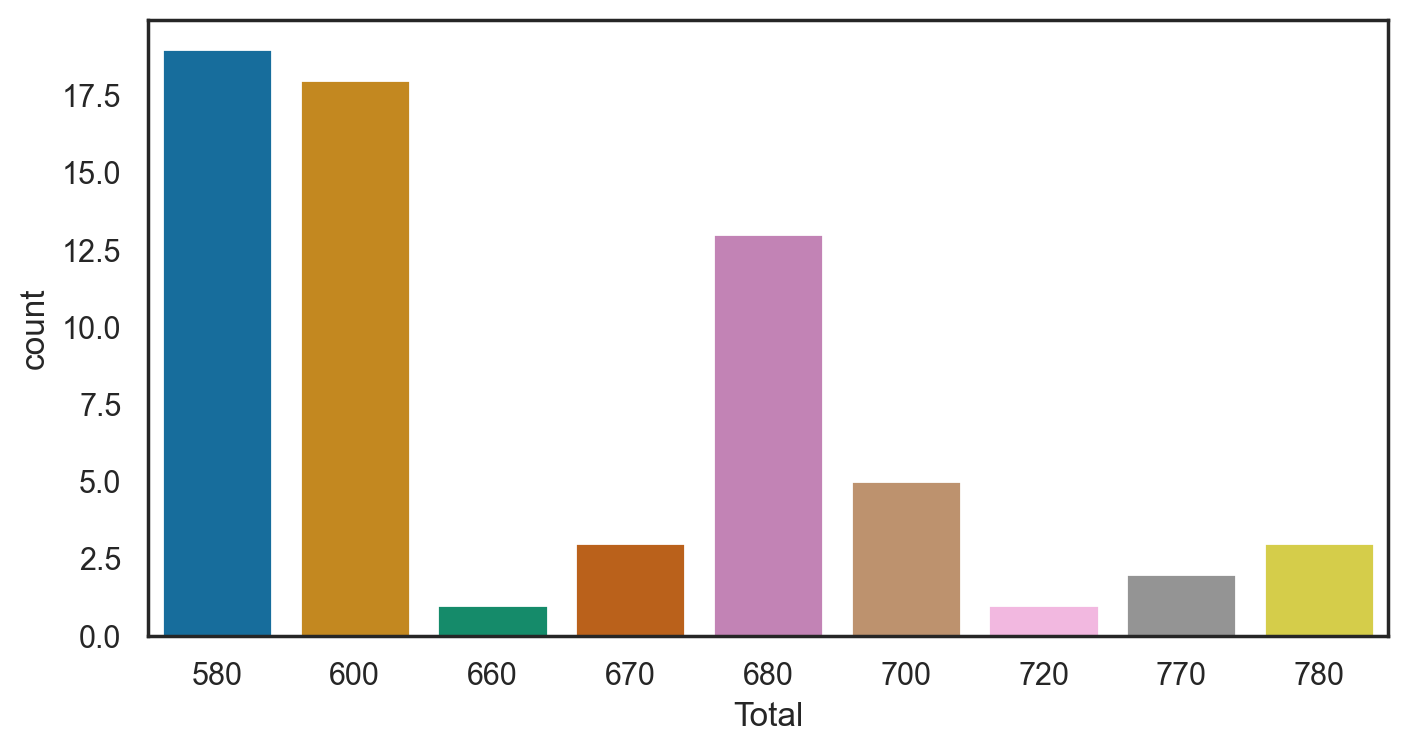

In [120]:
colors = sns.color_palette("colorblind", len(legendary['Total'].unique()))

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total", hue="Total", palette=colors, dodge=False, legend=False)
plt.show()

In [123]:
round(65 / 9, 2)

7.22

- 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것은,   
약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미

##### 일반 포켓몬의 Total 값


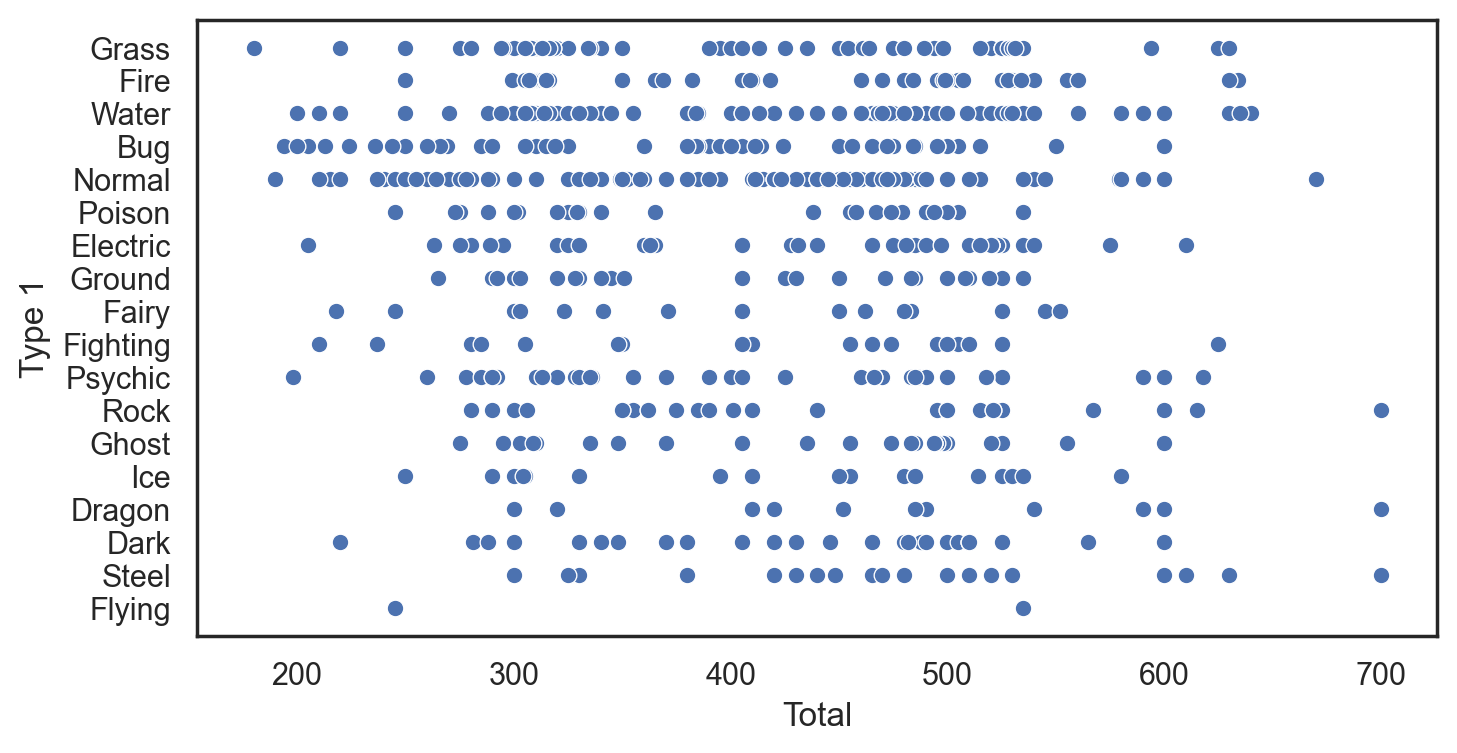

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [129]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [127]:
len(sorted(list(set(ordinary["Total"]))))

195

In [130]:
round(735 / 195, 2)

3.77

- 약 3.77마리만 같은 Total 스탯 값을 가진다.

### 결론  
- 전설의 포켓몬만이 가지는 Total 값(680, 720, 770, 780)들은 전설의 포켓몬에게만 나타남  
결정 요소: 포켓몬의 Total 값이 이러한 값들 중 하나라면, 그 포켓몬이 전설일 가능성이 높음  
즉, Total 값이 전설의 포켓몬을 식별하는 데 중요한 역할을 할 수 있다는 뜻

### 1-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름


In [133]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [134]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [135]:
# legendary 포켓몬 데이터에 'name_count' 값 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [136]:
# ordinary 포켓몬의 데이터에도 'name_count' 값을 추가
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


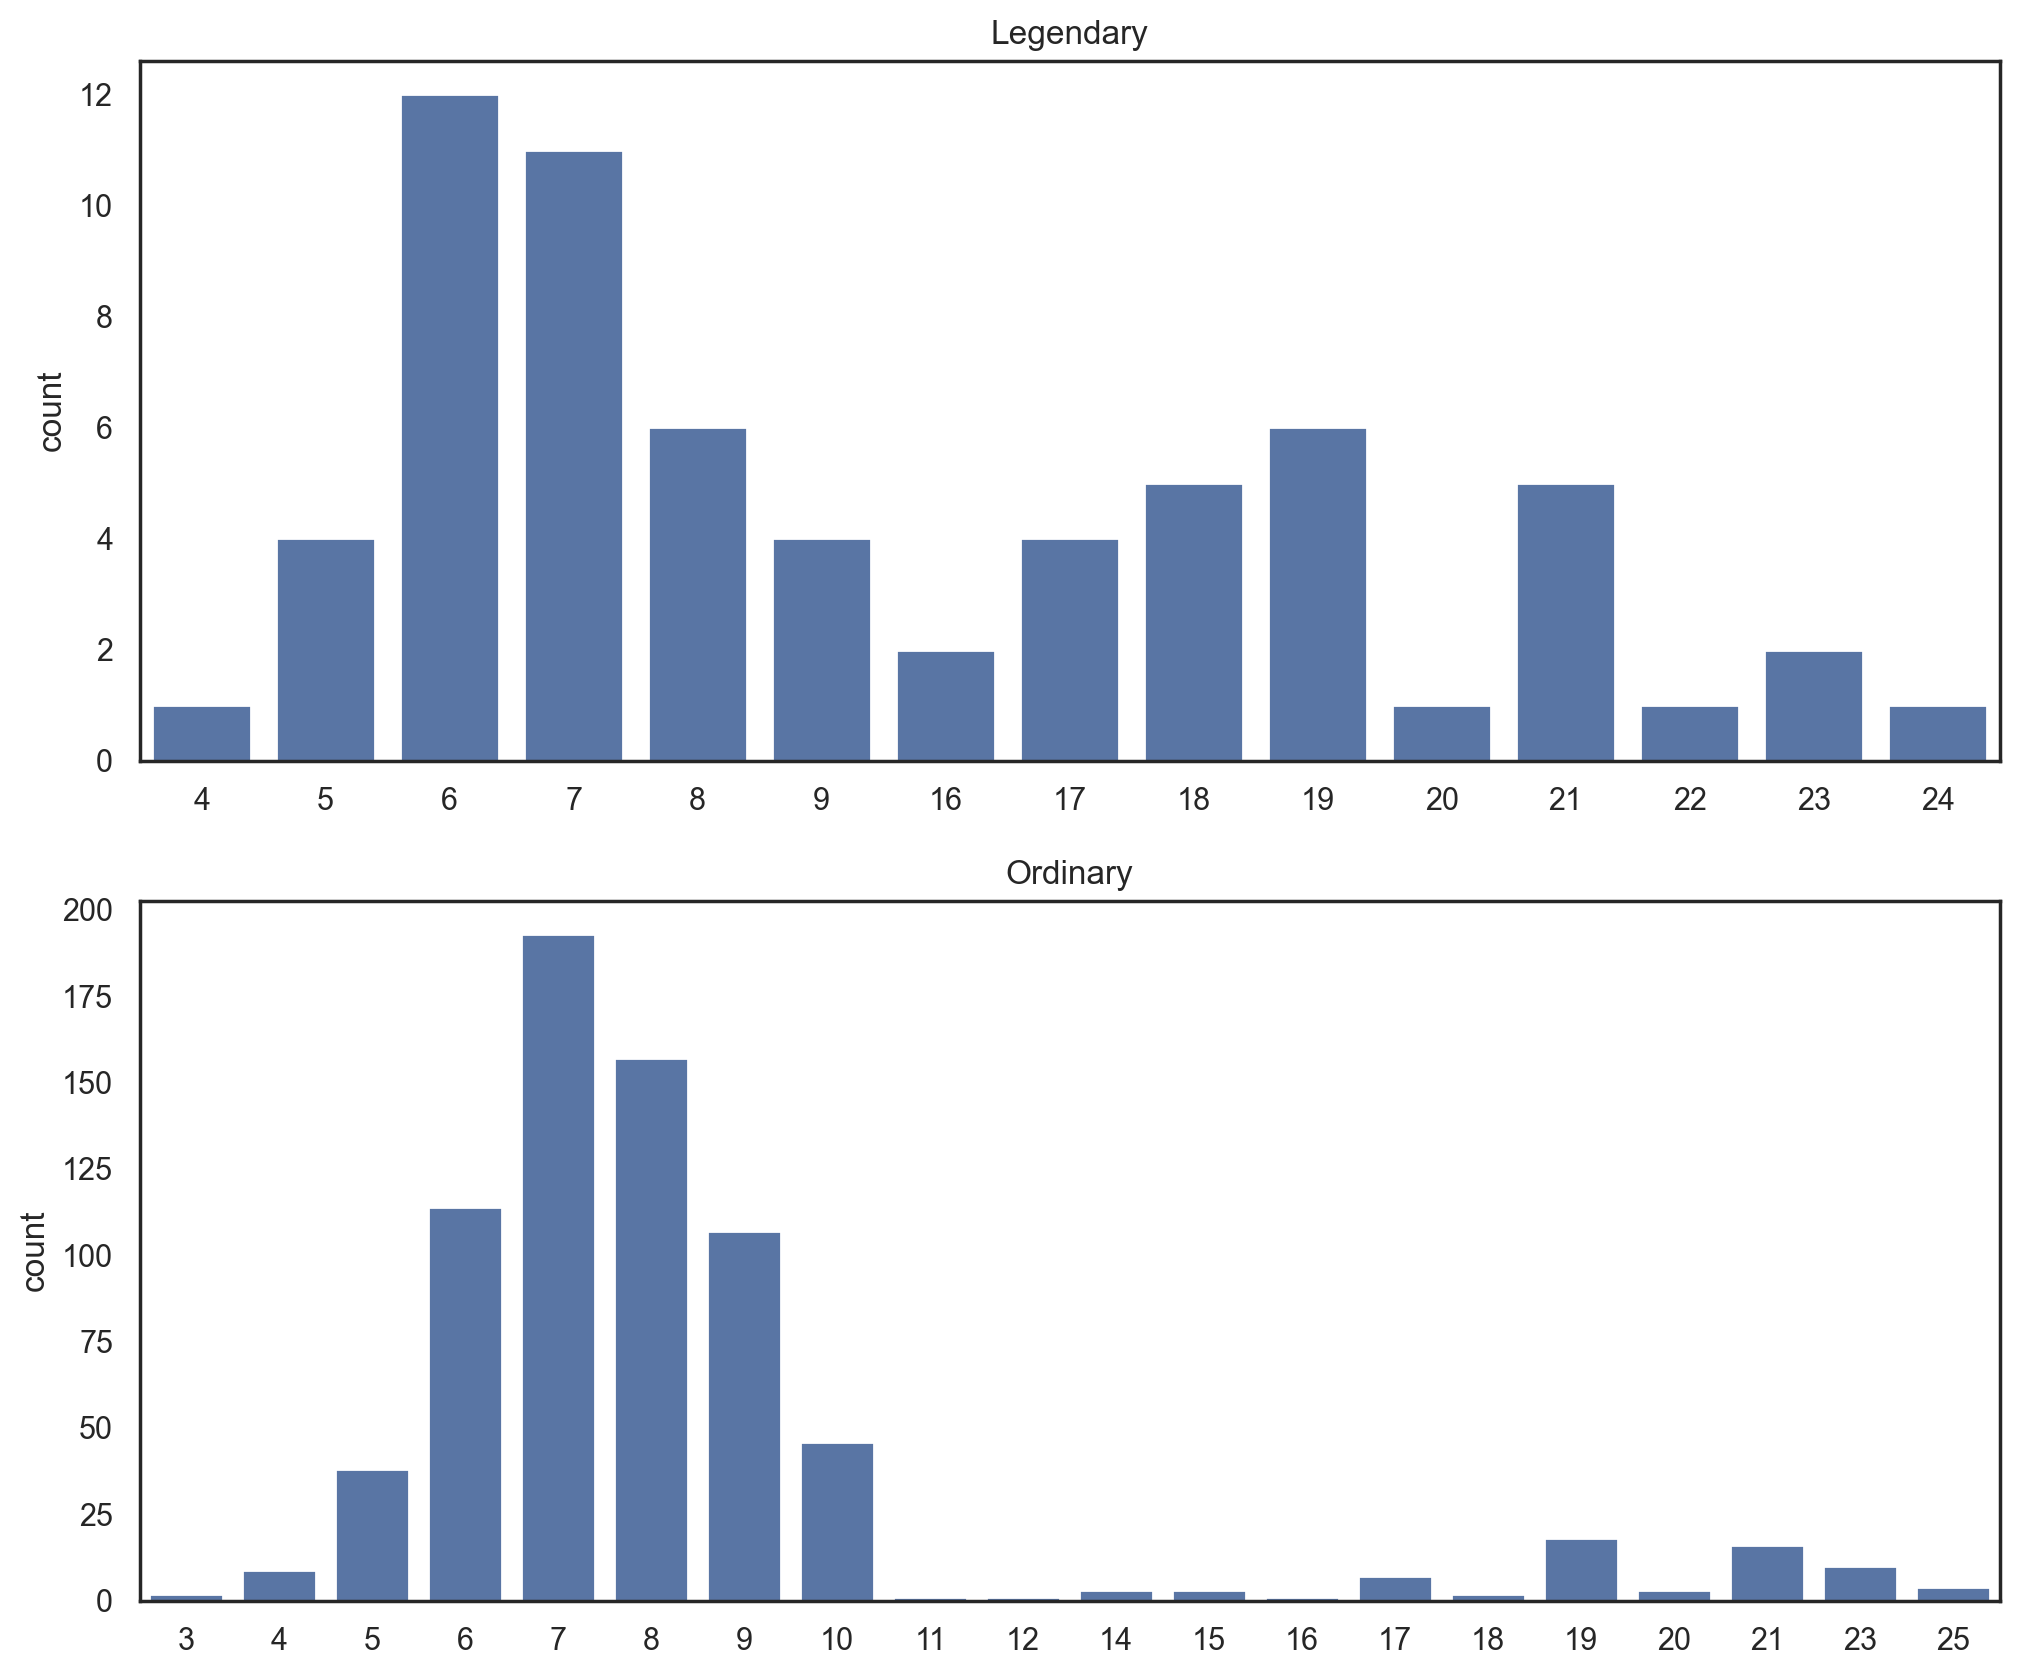

In [137]:
plt.figure(figsize=(12, 10))   

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

- 전설과 일반 이름이 10 이상일 확률 각각 41.54 % vs 15.65 %


In [141]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


##### 결론    
- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!  
적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!  
전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

#  1-13. 데이터 전처리 (1) 이름 길이 측정

1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

(1) 이름의 길이가 10 이상인가 아닌가

In [143]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [144]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


# 1-14. 데이터 전처리 (2) 높은 빈도 토큰 추출

포켓몬의 이름은 총 네 가지 타입
1. 한 단어면 ex. Venusaur
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

pandas의 isalpha() 함수
1. 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리  
2. isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인

In [147]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [148]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


문자 포함 확인

In [149]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


문자 변경

In [150]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


### 변경이 잘 반영됐는지 name_isalpha열에 False가 없음을 확인하자.

In [151]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


##### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

정규식 re 패키지를 사용

In [154]:
import re

In [159]:
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [156]:
temp = name_split[0]
temp

'CharizardMega'

대문자로 시작해서 소문자로 끝나는 토큰들로 분리

In [157]:
# [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
# [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
# * : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [ ]:
지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있다.

In [158]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

모든 이름에 토큰화를 적용하는 함수 생성

In [160]:
# 모든 이름에 토큰화를 적용하는 함수 생성
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)        
    return np.array(tokens)

In [161]:
# 테스트
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

전설의 포켓몬 데이터에 토큰화 적용

In [162]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
[np.str_('Articuno'), np.str_('Zapdos'), np.str_('Moltres'), np.str_('Mewtwo'), np.str_('Mewtwo'), np.str_('Mega'), np.str_('Mewtwo'), np.str_('X'), np.str_('Mewtwo'), np.str_('Mega'), np.str_('Mewtwo'), np.str_('Y'), np.str_('Raikou'), np.str_('Entei'), np.str_('Suicune'), np.str_('Lugia'), np.str_('Ho'), np.str_('Regirock'), np.str_('Regice'), np.str_('Registeel'), np.str_('Latias'), np.str_('Latias'), np.str_('Mega'), np.str_('Latias'), np.str_('Latios'), np.str_('Latios'), np.str_('Mega'), np.str_('Latios'), np.str_('Kyogre'), np.str_('Kyogre'), np.str_('Primal'), np.str_('Kyogre'), np.str_('Groudon'), np.str_('Groudon'), np.str_('Primal'), np.str_('Groudon'), np.str_('Rayquaza'), np.str_('Rayquaza'), np.str_('Mega'), np.str_('Rayquaza'), np.str_('Jirachi'), np.str_('Deoxys'), np.str_('Normal'), np.str_('Forme'), np.str_('Deoxys'), np.str_('Attack'), np.str_('Forme'), np.str_('Deoxys'), np.str_('Defense'), np.str_('Forme'), np.str_('Deoxys'), np.str_('Speed'), np.str_('Forme'), 

가장 많이 사용된 토큰 확인

In [164]:
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

[(np.str_('Forme'), 15),
 (np.str_('Mega'), 6),
 (np.str_('Mewtwo'), 5),
 (np.str_('Kyurem'), 5),
 (np.str_('Deoxys'), 4),
 (np.str_('Hoopa'), 4),
 (np.str_('Latias'), 3),
 (np.str_('Latios'), 3),
 (np.str_('Kyogre'), 3),
 (np.str_('Groudon'), 3)]

전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼으로 확인

In [165]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


# 1-15. 데이터 전처리 (3) 범주형 데이터 전처리

1. 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
2. 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

In [166]:
print(types)

['Ground', 'Dragon', 'Grass', 'Dark', 'Ghost', 'Normal', 'Fire', 'Rock', 'Flying', 'Bug', 'Fighting', 'Water', 'Psychic', 'Fairy', 'Electric', 'Steel', 'Ice', 'Poison']


원-핫 인코딩(One-Hot Encoding) 실행

In [167]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ground,Dragon,Grass,Dark,Ghost,Normal,Fire,Rock,Flying,Bug,Fighting,Water,Psychic,Fairy,Electric,Steel,Ice,Poison
0,Grass,Poison,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Grass,Poison,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Grass,Poison,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Grass,Poison,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,Fire,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


# 1-16. 모델구축 (1) 베이스라인

In [168]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [169]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [171]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [172]:
# 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [175]:
# 'target' 컬럼의 데이터를 변수 'y'에 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 훈련데이터와 학습데이터 분리

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


# 1-17. 모델구축 (2) Decision Tree 학습시키기


In [179]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


모델 정의

In [180]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

학습시키기

In [181]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

왼쪽 위부터 순서대로 TN, FP, FN, TP  
Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)

- TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우
- FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우
- FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우
- TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우

여기서 정확도(Accuracy)는,   
   
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{144 + 8}{144 + 8 + 3 + 5} = \frac{152}{160} = 0.95$

### But!! 데이터가 불균형하기 때문에 Accuracy로 성능 평가는 무의미

왜냐면,  
전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이기 때문에   
800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다.   
아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 의미  

### 다른 척도로 평가 필요

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recall 값이 0.62   
  
$Recall = \frac{TP}{TP + FN}$  
  
#####  Recall이 낮다는 것은 분모에 있는 FN값이 높다는 뜻.   
#####  즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많다는 의미  

  이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요

### 전처리했던 데이터들을 추가하면 Recall 관점에서 성능이 얼마나 올라갈지 확인

# 1-18. 모델구축 (3) 피쳐 엔지니어링 결과비교

In [192]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ground', 'Dragon', 'Grass', 'Dark', 'Ghost', 'Normal', 'Fire', 'Rock',
       'Flying', 'Bug', 'Fighting', 'Water', 'Psychic', 'Fairy', 'Electric',
       'Steel', 'Ice', 'Poison'],
      dtype='object')


제외시킬 칼럼
- "#" : ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외
- "Name" : 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체됨
- "name_nospace", "name_isalpha" : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요없음
- "Type 1" & "Type 2" : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요 없음
- "Legendary" : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용


In [193]:

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [194]:
target = "Legendary"
target

'Legendary'

사용할 feature에 해당하는 데이터를 'X' 변수에 저장

In [195]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


정답 데이터 'y'변수에 저장

In [ ]:
y = pokemon[target]
print(y.shape)
y.head()


X_train 부터 y_test까지로 분리

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


# 1-19. 모델구축 (4) 모델 다시 학습시키기

In [197]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

다시 학습시키고 예측

In [199]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)


[ True False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True False False False False False False False False
 False False False False False False False False  True False False False
  True  True False  True False False  True False False False False False
 False False False False False False False  True False False False False
  True False False False False  True False False False False False False
  True False False False]


Confustion Matrix 확인

In [200]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

Classification Report 확인

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



###  Recall 값이 기존 0.62에서 0.92로 급상승 : 데이터 정제만으로도 모델 성능 크게 개선!!

# *** 비교 모델 학습 ***
### 1. 로지스틱 회귀 (Logistic Regression)
### 2. 랜덤 포레스트 (Random Forest)
### 3. 서포트 벡터 머신 (Support Vector Machine, SVM)

1. 로지스틱 회귀

In [207]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=25, max_iter=1000)

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("로지스틱 회귀 분류 보고서:")
print(classification_report(y_test, y_pred_logreg))

로지스틱 회귀 분류 보고서:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



2. Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=25, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("랜덤 포레스트 분류 보고서:")
print(classification_report(y_test, y_pred_rf))

랜덤 포레스트 분류 보고서:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



3. SVM

In [209]:
from sklearn.svm import SVC
svm = SVC(random_state=25, kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("서포트 벡터 머신 분류 보고서:")
print(classification_report(y_test, y_pred_svm))

서포트 벡터 머신 분류 보고서:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147
        True       0.78      0.54      0.64        13

    accuracy                           0.95       160
   macro avg       0.87      0.76      0.80       160
weighted avg       0.95      0.95      0.95       160



# 모델 성능 비교

                    모델  정확도(Accuracy)  정밀도(Precision)  재현율(Recall)     F1-점수
0         DecisionTree        0.95625        0.666667     0.923077  0.774194
1  Logistic Regression        0.96250        0.733333     0.846154  0.785714
2        Random Forest        0.95625        0.714286     0.769231  0.740741
3                  SVM        0.95000        0.777778     0.538462  0.636364


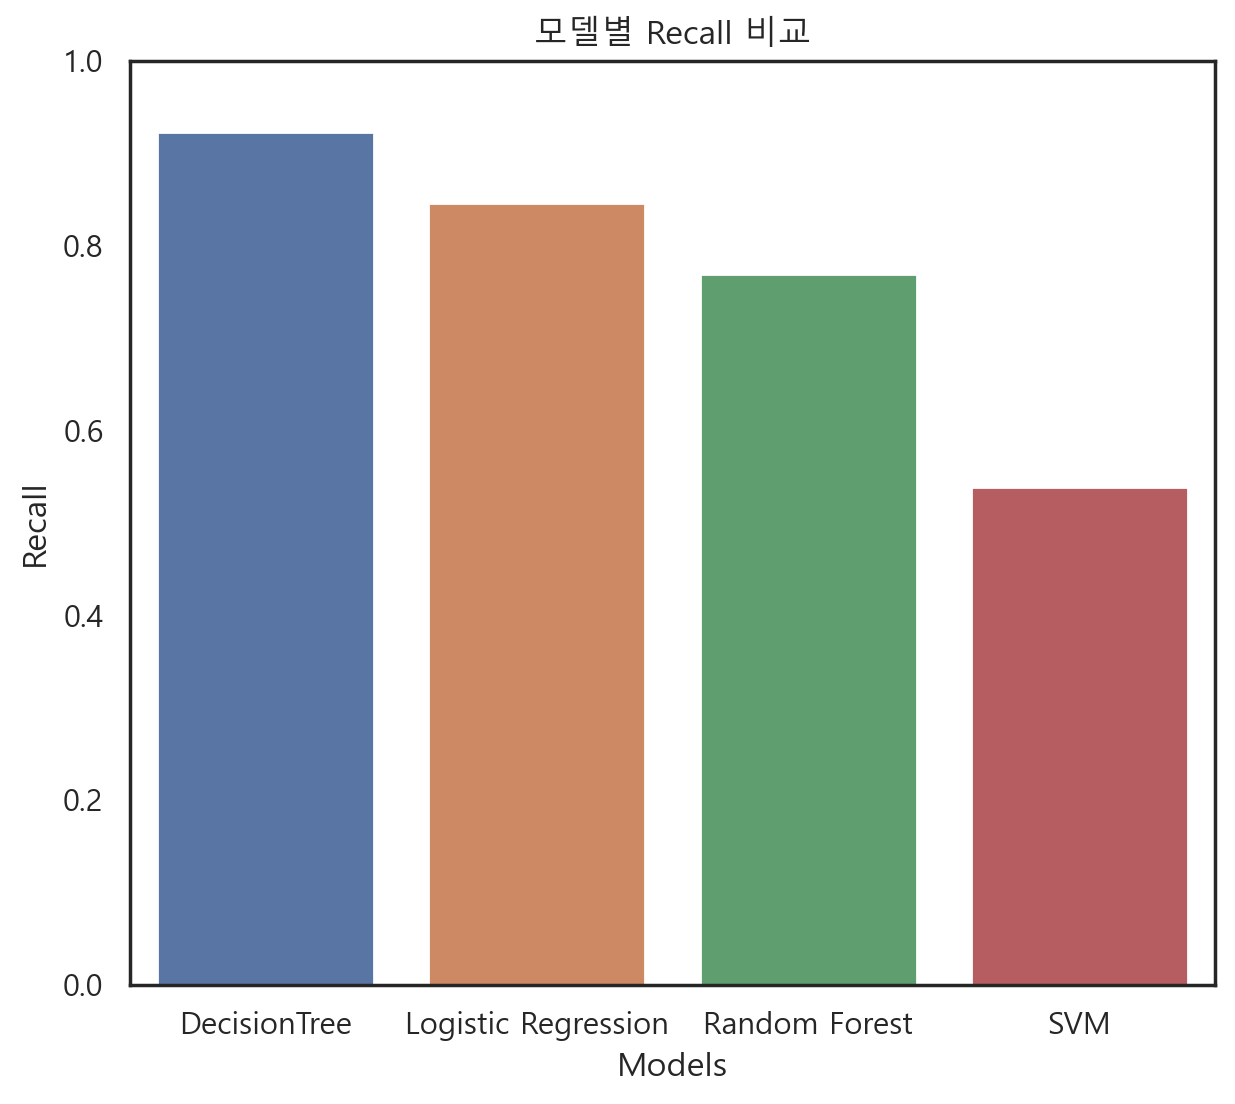

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'DecisionTree': model, 
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'SVM': svm,
}

performance = {
    '모델': [],
    '정확도(Accuracy)': [],
    '정밀도(Precision)': [],
    '재현율(Recall)': [],
    'F1-점수': []
}

for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    performance['모델'].append(name)
    performance['정확도(Accuracy)'].append(accuracy_score(y_test, y_pred))
    performance['정밀도(Precision)'].append(precision_score(y_test, y_pred))
    performance['재현율(Recall)'].append(recall_score(y_test, y_pred))
    performance['F1-점수'].append(f1_score(y_test, y_pred))

performance_df = pd.DataFrame(performance)
print(performance_df)

plt.figure(figsize=(7, 6))
sns.barplot(x='모델', y='재현율(Recall)', data=performance_df, hue='모델', legend=False)
plt.title('모델별 Recall 비교')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

### 1-20. 마무리

##### Summary

- Recall이 핵심 평가 지표  
Recall은 실제 전설의 포켓몬을 얼마나 잘 찾아내는지를 나타내는 지표  
전설의 포켓몬을 일반 포켓몬으로 잘못 분류하는 것(FN)은 중요한 데이터를 놓치는 심각한 실수(암진단과 동일)   
전설의 포켓몬이 매우 적은 수(전체의 약 8%)였기 때문에 불균형하고 sparse한 전설의 포켓몬을 정확히 식별하는 것이 중요  


- 모델 성능 분석    
이번 프로젝트에서 가장 중요한 지표였던 Recall 관점에서 보면, 의사결정나무가 가장 우수한 성능을 보여줌.  
전설의 포켓몬 13마리 중 약 12마리(92.3%)를 정확히 식별  
SVM은 정밀도는 높았지만(0.778), 재현율이 매우 낮음(0.538)  
로지스틱 회귀가 전반적으로 균형 잡힌 성능을 보여줌   

- 배운 점  
데이터가 불균형할 때는 단순히 정확도가 아닌, 상황에 맞는 평가 지표를 선택하는 것이 중요   
복잡한 모델이 항상 좋은 것은 아님. 의사결정나무라는 비교적 단순한 모델이 높은 Recall을 보여줌.



##### 회고    
- 이번 프로젝트를 통해 불균형 데이터셋에서 Recall의 중요성을 실제로 경험할 수 있었습니다.    
- 특히 전처리 과정을 직접해 보는 과정이 너무나 뜻깊고 유익했고 전처리를 통해 recall이 격하게 개선되는 과정이 인상적이었습니다.  
- 데이터의 특성과 비즈니스 맥락을 고려하여 적절한 평가 지표를 선택하고, 이를 최적화하는 방향으로 모델을 개발해야한다는 교훈을 얻었습니다.    


# References  
- [파이썬 차집합 함수(set difference)](https://www.w3schools.com/python/ref_set_difference.asp)  
- [판다스 isna() 함수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)
- [판다스 isalph() 함수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html)
- [람다 표현식과 자주 쓰이는 함수들](https://modulabs.co.kr/blog/lambda_map_filter_reduce/)
- [파이썬 정규표현식](https://wikidocs.net/4308)
- [파이썬 컨테이너](https://docs.python.org/3/library/collections.html#counter-objects)
- [Confusion Matrix](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)
- [Decision Tree Pros & Cons](https://www.geeksforgeeks.org/pros-and-cons-of-decision-tree-regression-in-machine-learning/)
- [Data Preprocess from Scikit Learn](https://scikit-learn.org/1.5/modules/preprocessing.html)
- [Comprehensive mind map of Machine Learning](https://www.notion.so/11-20-Machine-Learning-Bubble-Chart-Source-Mactores-Data-Science-team-2022-144bdbdd8d9c802f925ad80e7a8d1706?pvs=4)